# MILESTONE 2

## Perkenalan

Nama : Ravin Mizia Rayeok

Batch : 17-FTDS-RMT

``PRoblem Statement :``

Hotel mengalami penurunan pemasukan pada periode 2017 dan 2018. Dan ingin mengetahui apa saja faktor-faktor yang mempengaruhinya. Buatlah model untuk mengetahui secara lebih pasti, tipe customer yang seperti apa yang memiliki keseriusan untuk booking kamar di Hotel Budapest.

Berikut data booking customer yang cancel maupun yang tidak cancel. Buatlah model untuk memaksimalkan nilai presisi, analisa, dan berikan rekomendasi untuk pihak hotel. 


## Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None


# supaya rapih ignore warnings 
import warnings
warnings.filterwarnings("ignore")

## Data Loading

Link untuk ke Hugging Face :

https://huggingface.co/spaces/ravinmizia/h8dsft_Milestone2P1_Ravin_Mizia_R

In [39]:
data = pd.read_csv('Hotel Reservations.csv')

data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [40]:
data.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [41]:
data[data['booking_status']=='Not_Canceled'].shape

(24390, 19)

## Exploratory Data Analysis (EDA)  

### 1. Data Information and Description

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [99]:
data.shape

(36275, 18)

### 2. Presentase dan Trend Bulan Cancelation

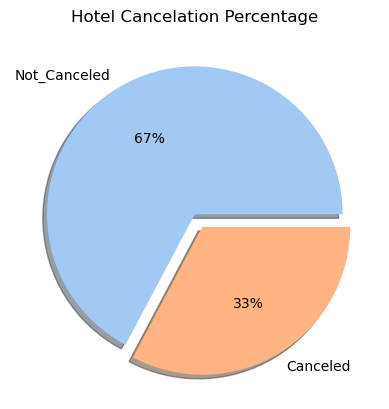

In [44]:
# plotting data on chart
plt.pie(data=data ,x=data.booking_status.value_counts(),labels=data.booking_status.unique(), autopct='%.0f%%', explode = [0, 0.1], shadow=True, colors=sns.color_palette('pastel'))
plt.title('Hotel Cancelation Percentage')

# displaying chart
plt.show()

Presentase customer yang melakukan cancelation pada periode 2017-07 sampai 2018-18 adalah sekitar 67%

Text(0.5, 1.0, 'plot NON CANCELATION')

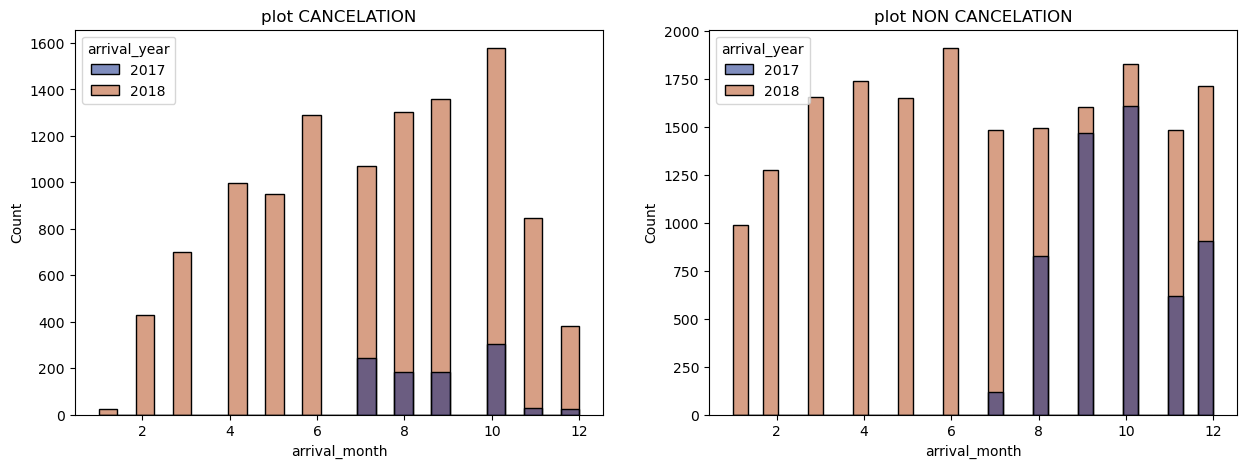

In [45]:
# bulan apa saja mereka biasanya cancel ?
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(15, 5))
sns.histplot(data = data[data.booking_status == 'Canceled'],x='arrival_month', hue='arrival_year', palette=sns.color_palette('dark',9), ax=ax1)
ax1.set_title('plot CANCELATION')
#ax1.set_ylim(2000)
sns.histplot(data = data[data.booking_status == 'Not_Canceled'],x='arrival_month', hue='arrival_year', palette=sns.color_palette('dark',9), ax=ax2)
ax2.set_title('plot NON CANCELATION')
#ax2.set_ylim(2000)


``INSIGHT``

Dari data customer yang melakukan cancelation, dapat dilihat bahwa pada plot diatas, bulan Juni, Juli, Agustus, September dan Oktober adalah bulan-bulan dimana banyak yang melakukan cancelations. Namun perlu diingat bahwa bulan itu adalah bulan masa liburan. Dimana saat itu memang secara general perilaku customer cenderung dimanis

### 3. Perbandingan Sistem Booking

8475
14739


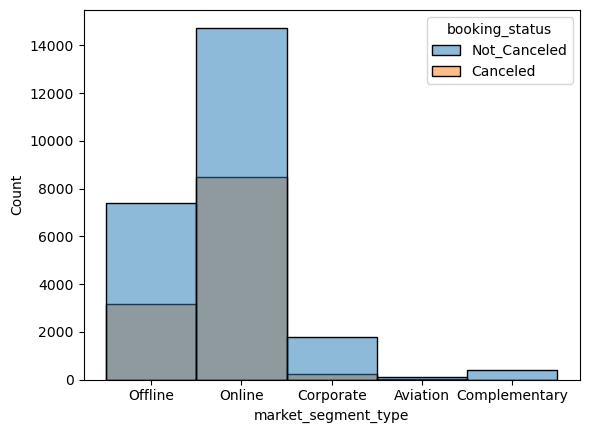

In [46]:
# presentase cancel online dan offline
sns.histplot(data = data,x='market_segment_type', hue='booking_status')

#jumlah data cancel
print(data[(data.booking_status == 'Canceled') & (data.market_segment_type == 'Online')].count()[0])

#jumlah data tidak cancel
print(data[(data.booking_status == 'Not_Canceled') & (data.market_segment_type == 'Online')].count()[0])

`INSIGHT`

Terlihat pada grafik diatas untuk booking yang di cancel, ternyata antara online dan offline perbandingannya tidak terlalu signifikan, namun beberapa poin menarik bisa diambil :

1. Dilihat dari proposional pperbandingannya, booking Offline sedikit mengurangi resiko untuk customer cancel dibandingkan booking online. Walaupun secara keseluruhan memang booking online lebih profitable.
2. Corporate booking memang tidak terlalu banyak terjadi namun kemungkinan untuk di cancelnya jauh lebih sedikit.

### 4. Special Request dan Cancelation

In [47]:
# nmoof spec request
data.no_of_special_requests.unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

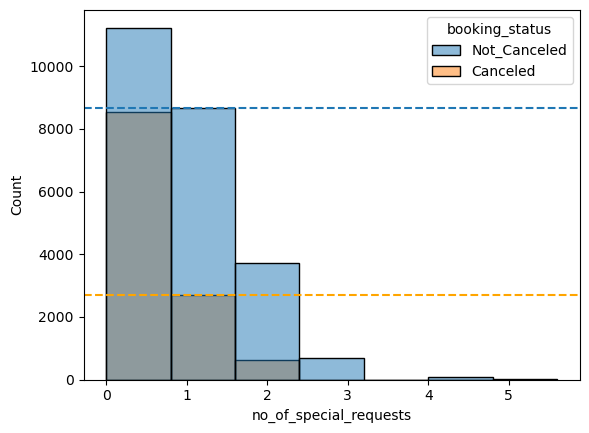

In [48]:
sns.histplot(data = data,x='no_of_special_requests', hue='booking_status',binwidth=0.8)
plt.axhline(data[(data.booking_status == 'Not_Canceled') & (data.no_of_special_requests == 1)].no_of_special_requests.count(),ls='--')
plt.axhline(data[(data.booking_status == 'Canceled') & (data.no_of_special_requests == 1)].no_of_special_requests.count(),ls='--',c='orange')

In [49]:
data.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


<Figure size 100x100 with 0 Axes>

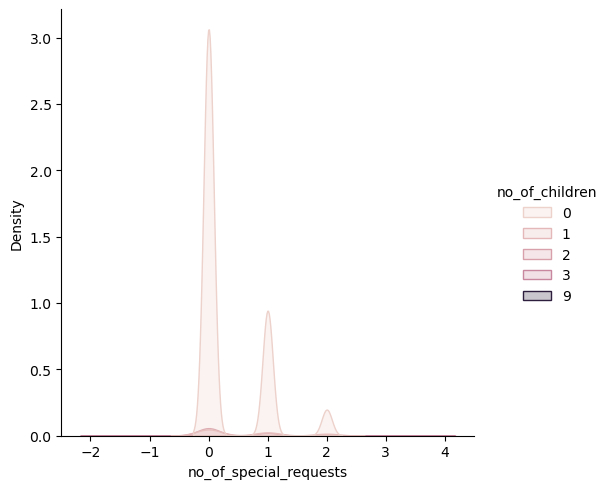

In [50]:
plt.figure(figsize=(1,1))
sns.displot(data[data.booking_status == 'Canceled'], x='no_of_special_requests', hue='no_of_children', kind='kde', fill=True)
plt.show()

`INSIGHT`

Infomasi yang bisa didapatkan pada plot diatas adalah, Secara proposional jika customer melakukan special request, maka kemungkinan untuk mereka melakukan cancelation akan sangat berkurang. 

Ini bisa menjadi poin penting untuk team marketing kedepan.

Tidak ada hubungan antara jumlah request dengan kepemilikan anak

### 5. Room Analysis

In [51]:
data.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


In [52]:
# plot harga kamar bulan LIBURAN
data[(data.arrival_month >= 7 ) & (data.arrival_month <= 10 )].loc[:,['room_type_reserved','avg_price_per_room']].groupby(by='room_type_reserved').mean()

,avg_price_per_room
room_type_reserved,
Room_Type 1,102.384149
Room_Type 2,91.705085
Room_Type 3,108.333333
Room_Type 4,134.107442
Room_Type 5,129.735315
Room_Type 6,188.264920
Room_Type 7,193.315632


In [53]:
# plot harga kamar bulan SELAIN LIBURAN
data[data.arrival_month < 7 ].loc[:,['room_type_reserved','avg_price_per_room']].groupby(by='room_type_reserved').mean()

,avg_price_per_room
room_type_reserved,
Room_Type 1,93.030373
Room_Type 2,86.245576
Room_Type 3,80.750000
Room_Type 4,121.622804
Room_Type 5,115.651724
Room_Type 6,181.885406
Room_Type 7,114.872979


`INSIGHT`

Hraga room di hotel meningkan secara keseluruhan pada bulan-bulan liburan

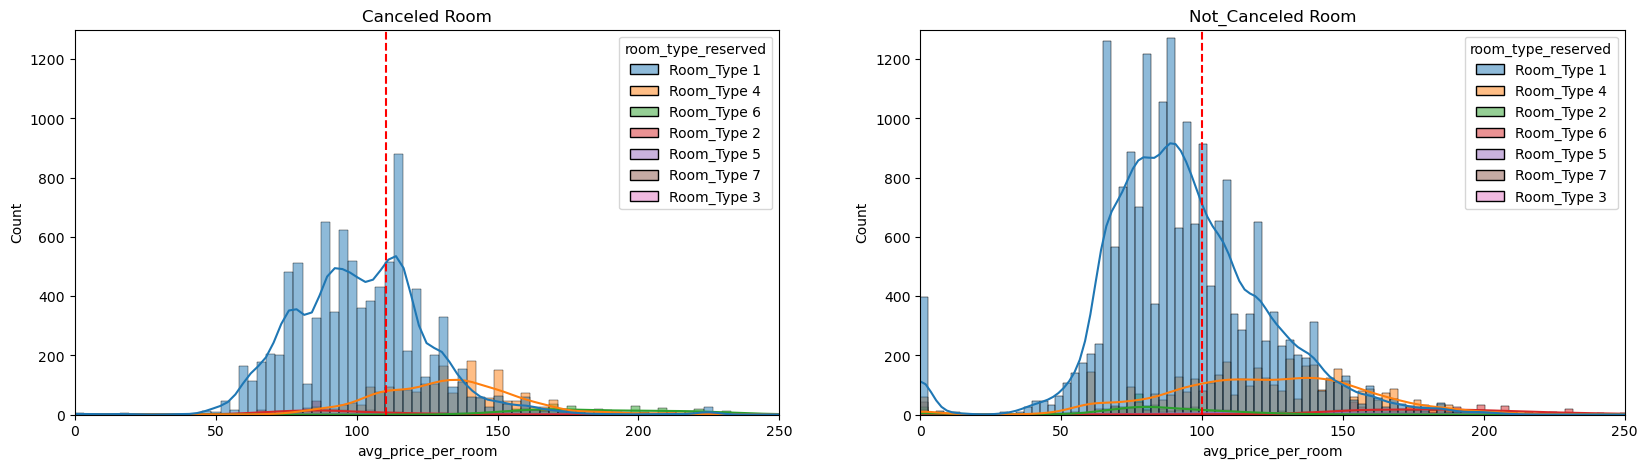

In [54]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(20, 5))
sns.histplot(data[data.booking_status=='Canceled'], x='avg_price_per_room', hue='room_type_reserved', fill=True, ax=ax1, kde=True)
ax1.set_title('Canceled Room')
ax1.set_xlim(0,250)
ax1.set_ylim(0,1300)
ax1.axvline(data[data.booking_status == 'Canceled'].avg_price_per_room.mean(),ls='--', c='r')


sns.histplot(data[data.booking_status=='Not_Canceled'], x='avg_price_per_room', hue='room_type_reserved', fill=True, ax=ax2, kde=True)
ax2.set_title('Not_Canceled Room')
ax2.set_xlim(0,250)
ax2.set_ylim(0,1300)
ax2.axvline(data[data.booking_status == 'Not_Canceled'].avg_price_per_room.mean(),ls='--', c='r')


In [55]:
data[data.booking_status == 'Not_Canceled'].avg_price_per_room.mean()

99.93141164411566

`INSIGHT`

Harga rata-rata dari hotel memiliki kemungkinan terhadap pembatalan booking, terutama pada masa liburan yang mana harga rata rata meingkat, ditambah ada variasi dari harga kamar walaupun tipenya sama yang menyebabkan harga semakin melonjak.

### 6. Pengaruh Lead Time Booking dan Check-In

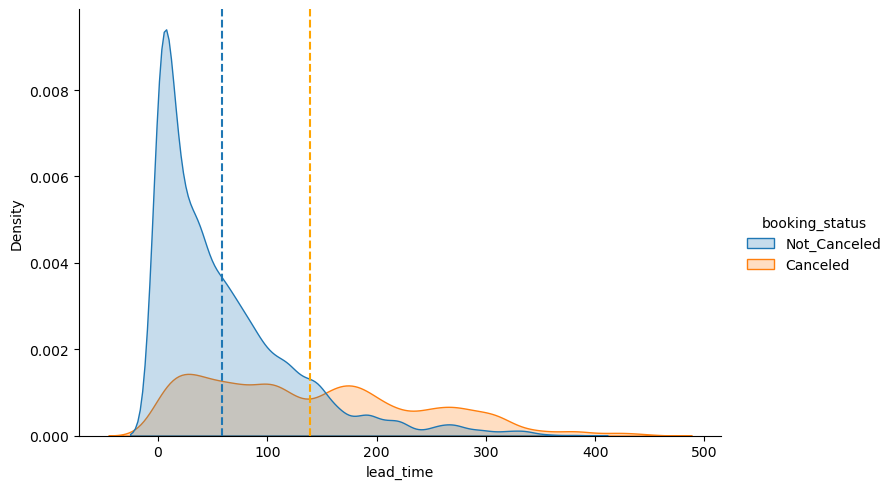

In [56]:
# plot lead time dan booking status
sns.displot(data, x='lead_time', hue='booking_status', kind='kde', fill=True, height=5, aspect=1.5)
plt.axvline(data[data.booking_status == 'Not_Canceled'].lead_time.mean(),ls='--')
plt.axvline(data[data.booking_status == 'Canceled'].lead_time.mean(),ls='--', c='orange')

In [57]:
data[data.booking_status == 'Canceled'].lead_time.mean()

139.21548169962136

`INSIGHT`

Terlihat dati plot, customer yang melakukan booking jauh-jauh hari atau rata-rata sekitar > 100 hari dari tanggal check-in memiliki kemungkinan lebih besar untuk melakukan cancelation, sedangkan apabila customer melakukan booking untuk maksimum 90 hari kedepan, mereka cenderung tidak melakukan cancelation.

## Feature Engineering

### Null Values Detection

In [58]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Data bersih dari null value

In [59]:
# drop booking ID karena unique
data = data.drop('Booking_ID', axis=1)

### Split Data

In [60]:
data.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


In [61]:
# X dan y
X = data.drop('booking_status', axis=1)
y = data['booking_status']

In [62]:
# split data based on test train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [63]:
# create categorical and numerical columns

num_columns = X_train.select_dtypes(include='number').columns.tolist()
cat_columns = X_train.select_dtypes(include='object').columns.tolist()


print('Num Columns : ', num_columns)
print('cat Columns : ', cat_columns)

Num Columns :  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
cat Columns :  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [64]:
# create categorical and numerical data

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
21906,2,0,0,3,0,56,2018,6,21,0,0,0,87.32,1
14796,2,0,0,1,0,159,2018,2,13,0,0,0,70.00,0
4100,2,0,0,2,0,86,2018,8,12,0,0,0,107.10,1


In [65]:
# split X train non categorical

X_train_num_nb = X_train_num.loc[:,['lead_time','avg_price_per_room']]
X_test_num_nb = X_test_num.loc[:,['lead_time','avg_price_per_room']]

### Y train and Test Mapping

In [66]:
# ganti nilai y train dan test dengan mapp
target_map = {'Canceled': 0, 'Not_Canceled' : 1}

y_train_map = y_train.map(target_map)
y_test_map = y_test.map(target_map)

y_test_map[0:5]

30492    1
31158    1
3024     1
30429    0
29187    1
Name: booking_status, dtype: int64

### Outlier Detection

In [67]:
# cek skewness
for col in X_train_num_nb.columns:
    print(col, 'Skewness : ', X_train_num_nb[col].skew() )

lead_time Skewness :  1.2879062067381843
avg_price_per_room Skewness :  0.6996975081989565


Terlihat skewness tidak terlalu extreme, akan dilakukan handling dengan IQR 

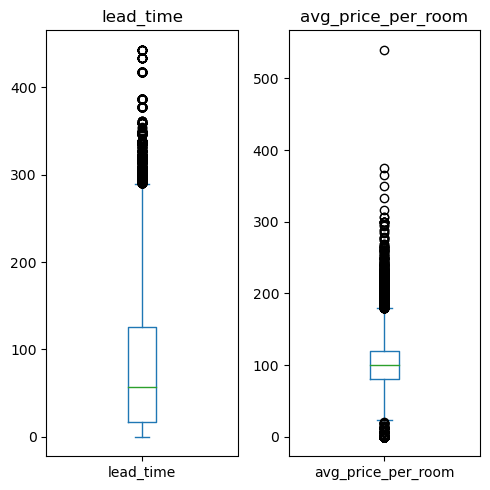

In [68]:
# Membuat figur boxplot dan distribution plot untuk visualisasi oulier

fig, axes = plt.subplots(nrows=1, ncols=len(X_train_num_nb.columns), figsize=(5,5))

for i, column in enumerate(X_train_num_nb.columns):
    
    X_train_num_nb[column].plot(ax=axes[i], kind='box')
    axes[i].set_title(column)


plt.tight_layout()
plt.show()

Pada data tidak terlihat adanya outlier yang signifikan, hanya pada kolomavg_price_per_room dan lead_time

In [69]:
# cek outlier di avg_price_pe_room
data[data['avg_price_per_room']==data['avg_price_per_room'].max()]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33114,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,2018,3,25,Offline,0,0,0,540.0,0,Canceled


Outlier hanya 1 saja dan mungkin salah ketik, akan di handling dengan mengganti data menjadi data terbesar setelah outlier

In [70]:
# cek nilai tertinggi setelah max
data['avg_price_per_room'].sort_values(ascending=False).head(2)

33114    540.0
9461     375.5
Name: avg_price_per_room, dtype: float64

dapat indexnya 33114

In [71]:
# ganti dengan terbesar berikutnya yaitu 375
data['avg_price_per_room'][33114] = data['avg_price_per_room'][9461]
data['avg_price_per_room'].sort_values(ascending=False).head(2)

9461     375.5
33114    375.5
Name: avg_price_per_room, dtype: float64

### Scaling Numerical Data

In [72]:
# cek skewness
for col in X_train_num_nb.columns:
    print(col, 'Skewness : ', X_train_num_nb[col].skew())

lead_time Skewness :  1.2879062067381843
avg_price_per_room Skewness :  0.6996975081989565


Data terdistribusi cenderung pada range normal, oleh karena itu dilakukan scaling dengan standard scaller

In [73]:
# standard scaler lib
from sklearn.preprocessing import StandardScaler

In [74]:
# menggunakan standard scaler untuk kolom numerical yang non categorical
scaler = StandardScaler()

scaler.fit(X_train_num_nb)

X_train_nb_scaled = scaler.transform(X_train_num_nb)
X_test_nb_scaled = scaler.transform(X_test_num_nb)
X_train_nb_scaled

array([[-0.34188212, -0.4563528 ],
       [ 0.85609704, -0.94985568],
       [ 0.00704385,  0.10724345],
       ...,
       [-0.55123771, -1.36044324],
       [ 1.07708349,  0.6919247 ],
       [-0.72570069, -2.94438234]])

### Correlation using Chi2 and Pearson

In [75]:
# concat num
X_train_num_target = pd.concat([X_train_num,y_train], axis=1)
X_train_num_target.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
21906,2,0,0,3,0,56,2018,6,21,0,0,0,87.32,1,Not_Canceled
14796,2,0,0,1,0,159,2018,2,13,0,0,0,70.00,0,Not_Canceled


In [76]:
from scipy.stats import chi2_contingency

results = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])

# looping chi2 test
for col in X_train_num.columns:
    contingency_table = pd.crosstab(y_train, X_train_num[col])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    # Append 
    results = results.append({'Feature': col, 'Chi-Squared': chi2, 'p-value': p}, ignore_index=True)

results.sort_values(by='p-value',ascending=True)

,Feature,Chi-Squared,p-value
5,lead_time,7618.874972,0.000000e+00
12,avg_price_per_room,8045.475944,0.000000e+00
13,no_of_special_requests,1995.081442,0.000000e+00
7,arrival_month,1117.049925,1.207904e-232
6,arrival_year,913.436827,1.177172e-200
9,repeated_guest,336.595762,3.517741e-75
3,no_of_week_nights,336.861820,2.642486e-61
0,no_of_adults,253.197109,1.332883e-53
4,required_car_parking_space,226.699539,3.127090e-51
11,no_of_previous_bookings_not_canceled,310.380737,1.812633e-38


Terlihat pada chi2 sqare fitur yang memiliki chi-square rendah dan p-value tertinggi adalah yang paling dependant pada target variable

<AxesSubplot: >

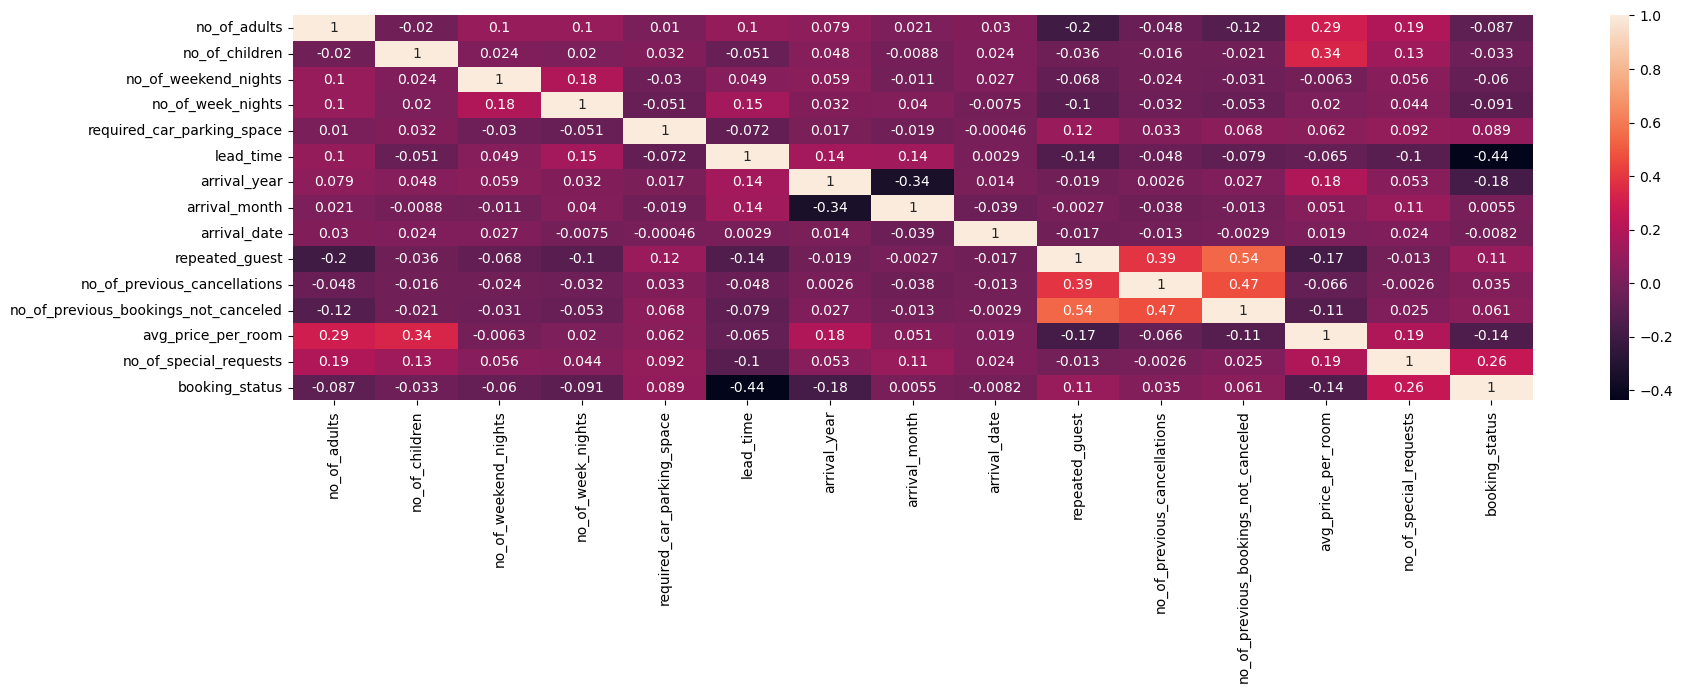

In [77]:
# plot pearson
pearson_num = pd.concat([X_train_num, y_train_map],axis=1)
plt.figure(figsize=(20,5))
sns.heatmap(pearson_num.corr(), annot=True)


Dari hasil Chi squared test dan pearson correlation, Hanya kolom numerical [lead_time , avg_price_per_room , no_of_special_requests, repeated_guest]

kolom ['arrival_year'] merupakan kolom categorical karena nilainya hanya 2018 dan 2017 dah tidak terlalu berguna untuk prediksi di data baru

In [78]:
# final kolom numerik
num_columns_final = ['lead_time' , 'avg_price_per_room' , 'no_of_special_requests', 'repeated_guest']

### Encoding Categorical Data

In [79]:
# cek kolom unique
X_train_cat.nunique()

type_of_meal_plan      4
room_type_reserved     7
market_segment_type    5
dtype: int64

Mennggunakan One Hot Encoder karena kolom bukan jenis data categorical ordinal

In [80]:
# code menggunakan one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit(X_train_cat)
X_train_cat_ohe = ohe.transform(X_train_cat)
X_test_cat_ohe = ohe.transform(X_test_cat)

columns_ohe = ohe.get_feature_names(X_train_cat.columns)

X_train_cat_ohe

<29020x16 sparse matrix of type '<class 'numpy.float64'>'
	with 87060 stored elements in Compressed Sparse Row format>

In [81]:
X_test_cat_ohe_df = pd.DataFrame(X_test_cat_ohe.toarray(), columns=columns_ohe )
X_test_cat_ohe_df.head(2)

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Chi2 Squared untuk categorical data

In [82]:
X_train_cat.head(2)

,type_of_meal_plan,room_type_reserved,market_segment_type
21906,Meal Plan 1,Room_Type 4,Online
14796,Meal Plan 1,Room_Type 1,Offline


In [83]:
from scipy.stats import chi2_contingency

results_cat = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])

# looping chi2 test
for col in X_train_cat.columns:
    contingency_table = pd.crosstab(y_train, X_train_cat[col])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    # Append 
    results_cat = results_cat.append({'Feature': col, 'Chi-Squared': chi2, 'p-value': p}, ignore_index=True)

results_cat.sort_values(by='p-value',ascending=True)

,Feature,Chi-Squared,p-value
2,market_segment_type,653.139296,4.874246e-140
0,type_of_meal_plan,214.032506,3.914055e-46
1,room_type_reserved,46.481938,2.373470e-08


Dari hasil chi sqared test, chi value dan p value terlihat tidak terlalu signifikan, akan dilanjutkan dengan pearson method

### Pearson Categorical Data

<AxesSubplot: >

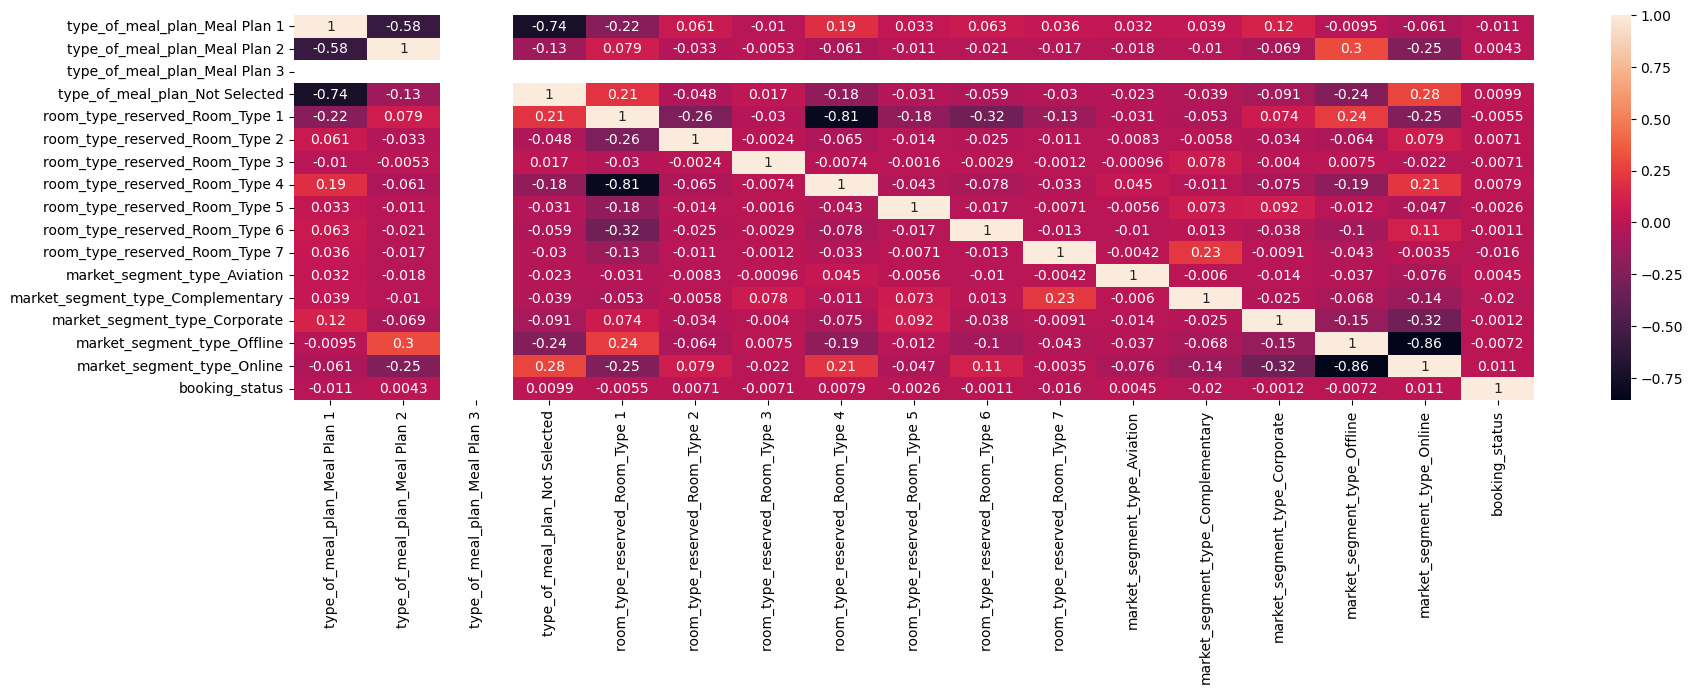

In [84]:
# plot pearson
pearson_cat = pd.concat([X_test_cat_ohe_df, y_train_map],axis=1)
plt.figure(figsize=(20,5))
sns.heatmap(pearson_cat.corr(), annot=True)

Dari hasil pearson test, tidak ditemukan adanya korelasi kuat antara target dan fitur. Ini mengkonfirmasi hasil chi2 test yang telah dilakukan sebelumnya.

Jadi semua fitur kategorikal tidak akan digunakan

### Final Feature Selection

In [85]:
# final dataframe
X_train_final = X_train.loc[:,num_columns_final]
X_test_final = X_test.loc[:,num_columns_final]
X_test_final.head(2)

,lead_time,avg_price_per_room,no_of_special_requests,repeated_guest
30492,44,77.76,0,0
31158,21,129.00,1,0


In [86]:
# ganti nilai y train dan test dengan mapp
target_map = {'Canceled': 0, 'Not_Canceled' : 1}

y_train_map = y_train.map(target_map)
y_test_map = y_test.map(target_map)

y_test_map[0:3]

30492    1
31158    1
3024     1
Name: booking_status, dtype: int64

## Model Definition and Training

In [87]:
# model importing dari semua model
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [88]:
# model definition
lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf  = RandomForestClassifier()
knn = KNeighborsClassifier()
xb = xgb.XGBClassifier()

models_list = [lr,svc,dt,rf,knn,xb]

In [89]:
# mmenggunakan loop
# Fit dengan each model
for model in models_list:

    model.fit(X_train_final, y_train_map)  

## Pipeline Modelling

### Pipe Building

In [90]:
# pipline model 
from sklearn.pipeline import Pipeline
pipe_rf = Pipeline([("scaler", StandardScaler()), ("RandomForest", RandomForestClassifier())])
pipe_svc = Pipeline([("scaler", StandardScaler()), ("SVC", SVC())])
pipe_lr = Pipeline([("scaler", StandardScaler()), ("LogReg", LogisticRegression())])
pipe_dt = Pipeline([("scaler", StandardScaler()), ("DecTree", DecisionTreeClassifier())])
pipe_knn = Pipeline([("scaler", StandardScaler()), ("KNN", KNeighborsClassifier())])
pipe_xb = Pipeline([("scaler", StandardScaler()), ("XGB", xgb.XGBClassifier())])

In [91]:
# Pipeline Training

#SVC
pipe_svc.fit(X_train_final,y_train_map)

#Random Forest
pipe_rf.fit(X_train_final,y_train_map)

#Log Regression
pipe_lr.fit(X_train_final,y_train_map)

# Decission Tree
pipe_dt.fit(X_train_final,y_train_map)

#XGBoost
pipe_xb.fit(X_train_final,y_train_map)

# KNN
pipe_knn.fit(X_train_final,y_train_map)

Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

### Pipe Scoring

In [92]:
# scoring pipeline
print("Test score SVC                    : {:.3f}".format(pipe_svc.score(X_test_final, y_test_map)))
print("Test score Random Forest          : {:.3f}".format(pipe_rf.score(X_test_final, y_test_map)))
print("Test score Logistic Regression    : {:.3f}".format(pipe_lr.score(X_test_final, y_test_map)))
print("Test score Decission Tree         : {:.3f}".format(pipe_dt.score(X_test_final, y_test_map)))
print("Test score KNN                    : {:.3f}".format(pipe_knn.score(X_test_final, y_test_map)))
print("Test score XGBoost                : {:.3f}".format(pipe_xb.score(X_test_final, y_test_map)))

Test score SVC                    : 0.785
Test score Random Forest          : 0.852
Test score Logistic Regression    : 0.768
Test score Decission Tree         : 0.835
Test score KNN                    : 0.831
Test score XGBoost                : 0.847


Scoring pipeline bergantung interpretasinya terhadap model yang digunakan, misal model logistic regression secara umum memakai akurasi untuk mengukur performa suatu model. Dalam case ini, model yang paling unggul adalah model ``RandomForest``

## Model Evaluation Classifcation Report

Untuk Evaluasi akan difokuskan kepada nilai ``PRECISSION`` karena hotel ingin customer yang benar- benar serius dan tidak cancel booking

### Evaluation in Train Set

**Menngunakan Pipeline Model**

In [93]:
from sklearn.metrics import classification_report

# buat dataframe result dari classification rport
results_df = pd.DataFrame()
pipe_list = [pipe_dt,pipe_svc,pipe_knn,pipe_lr,pipe_xb,pipe_rf]

for model in models_list:
    y_pred = model.predict(X_train_final)
    report = classification_report(y_train_map, y_pred, output_dict=True)
    model_name = str(model)

    # Append 
    results_df = results_df.append(pd.DataFrame(report).transpose().assign(model_name = model_name))

# hasil rata rata test
results_df['model_name'][0:5] = 'LogReg()'
results_df['model_name'][5:10] = 'SVC()'
results_df['model_name'][10:15] = 'DecissionTree()'
results_df['model_name'][15:20] = 'RandomForest()'
results_df['model_name'][20:25] = 'KNN()'
results_df['model_name'][25:30] = 'XGBClassifier()'

results_df[results_df.index == '1'].sort_values(by='f1-score', ascending=False)

,precision,recall,f1-score,support,model_name
1,0.972391,0.987488,0.979881,19581.0,RandomForest()
1,0.983579,0.975793,0.979670,19581.0,DecissionTree()
1,0.878087,0.951586,0.913360,19581.0,XGBClassifier()
1,0.882797,0.938205,0.909658,19581.0,KNN()
1,0.797081,0.903529,0.846973,19581.0,LogReg()
1,0.771065,0.937950,0.846359,19581.0,SVC()


Trainng kepada train set dapat mendeteksi indikasi model apakah ada `Overfitting` atau tidak. Sepertinya Decission Tree punya indikasi itu.

### Evaluation in Test Set

**Menggunakan Pipeline Model**

In [94]:
from sklearn.metrics import classification_report

# buat dataframe result dari classification rport
results_df = pd.DataFrame()
pipe_list = [pipe_lr,pipe_svc,pipe_dt,pipe_rf,pipe_knn,pipe_xb]

for model in pipe_list:
    y_pred = model.predict(X_test_final)
    report = classification_report(y_test_map, y_pred, output_dict=True)
    model_name = str(model)

    # Append 
    results_df = results_df.append(pd.DataFrame(report).transpose().assign(model_name = model_name))

# hasil rata rata test
results_df['model_name'][0:5] = 'LogReg()'
results_df['model_name'][5:10] = 'SVC()'
results_df['model_name'][10:15] = 'DecissionTree()'
results_df['model_name'][15:20] = 'RandomForest()'
results_df['model_name'][20:25] = 'KNN()'
results_df['model_name'][25:30] = 'XGBClassifier()'

results_df[results_df.index == '1'].sort_values(by='f1-score', ascending=False)

,precision,recall,f1-score,support,model_name
1,0.873127,0.908713,0.890564,4809.0,RandomForest()
1,0.850568,0.933874,0.890277,4809.0,XGBClassifier()
1,0.851235,0.903098,0.876400,4809.0,KNN()
1,0.873423,0.878145,0.875778,4809.0,DecissionTree()
1,0.787407,0.925764,0.850999,4809.0,SVC()
1,0.781740,0.902682,0.837869,4809.0,LogReg()


Terlihat rata-rata nilai presisi dapalam evaluasi tets set, Random Forest dan Decission Tree memiliki nilai `Precission` yang lebih besar daripada model lain untuk case booking yang `Not Canceled`

Karena perbedaannya sangat sedikit, akan dilakukan evaluasi lanjutan seperti ``Cross_Validation dan ROC ``

## Model Evaluation ROC Curve

**Menggunakan Pieline Model**

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())]) 1 AUC: 0.8169639084661204
Pipeline(steps=[('scaler', StandardScaler()),
                ('DecTree', DecisionTreeClassifier())]) 2 AUC: 0.8289574246434569
Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest', RandomForestClassifier())]) 3 AUC: 0.9121578816089415
Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]) 4 AUC: 0.8806624843341058
Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_

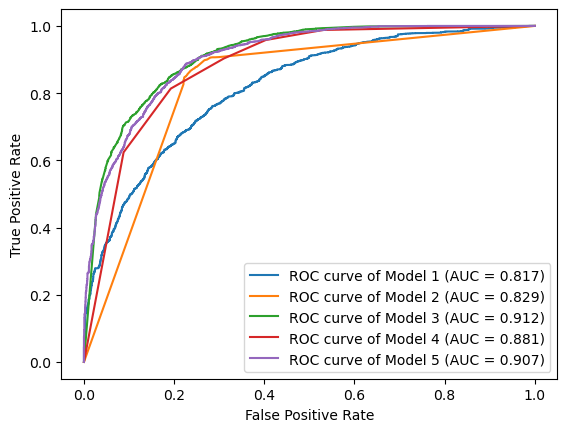

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pipe_list_2 = [pipe_lr,pipe_dt,pipe_rf,pipe_knn,pipe_xb]

for i, model in enumerate(pipe_list_2):
    # make predictions on the test set
    preds = model.predict_proba(X_test_final)[:,1]
    # kalkulasi AOC
    auc = roc_auc_score(y_test_map, preds)
    print(model, i+1, "AUC:", auc)

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_map, preds)
    plt.plot(fpr, tpr, label='ROC curve of Model %d (AUC = %0.3f)' % (i+1,auc))
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


DIlihat dari AUC scorenya, random forest memimpin dengan skor `0.912` dan ini mengalahkan Decission Tree (``0.829``) dan XGBoost (``0.907``)

## Model Evaluation Cross Validation

**Menggunakan Pipeline**

In [96]:
# import cross validation
from sklearn.model_selection import cross_val_score

# model yang digunakan
pipe_list = [pipe_lr,pipe_dt,pipe_rf,pipe_knn,pipe_xb, pipe_svc]

# Print the mean and standard deviation of the model scores
for i in pipe_list:
    cross_score = cross_val_score(i, X_train_final, y_train_map, cv=5)

    print(i,'   Accuracy for each fold  =    ', cross_score)
    print('   CV Scores: Mean         =    ', cross_score.mean())
    print('   CV Scores: Std          =    ', cross_score.std())
    print('')

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())])    Accuracy for each fold  =     [0.77963473 0.78497588 0.78118539 0.77325982 0.77911785]
   CV Scores: Mean         =     0.7796347346657477
   CV Scores: Std          =     0.0037904893177119077

Pipeline(steps=[('scaler', StandardScaler()),
                ('DecTree', DecisionTreeClassifier())])    Accuracy for each fold  =     [0.82770503 0.83063405 0.82425913 0.82167471 0.83097864]
   CV Scores: Mean         =     0.8270503101309442
   CV Scores: Std          =     0.003616388903361601

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest', RandomForestClassifier())])    Accuracy for each fold  =     [0.84993108 0.85010338 0.85527223 0.84527912 0.85130944]
   CV Scores: Mean         =     0.8503790489317712
   CV Scores: Std          =     0.0031967101704504894

Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])    Accuracy for each fold  =     [0.8

Random forest memiliki performa akurasi yang paling unggul dibandingkan dengan model lainnya yaitu :

1. RanfomForest = ``0.850``
2. DecissionTree = ``0.827``
3. XGBoost = ``0.853``
4. KNNeighbor = ``0.839``
5. LogistiRegression = ``0.779``
6. SCV = ``0.795``

`HASIL EVALUASI`

**Dari seluruh rangkaian evaluasi yang dilakukan pada baseline model, model** ``Random Forest`` **lah yang memiliki presisi dan performa yang paling baik untuk digunakan pihak hotel**

## Hyperparameter Tuning

Tuning `Random Forest`

In [97]:
# Using Grid Search
from sklearn.model_selection import GridSearchCV

**Tuning menggunakan Pipeline Model**

In [98]:
# Parameter Tuning Menggunakan Pipeline Model
param_grid_rf = {'RandomForest__n_estimators': [350,400,500],a
              'RandomForest__max_depth': [10,15],
              'RandomForest__min_samples_split': [2,3],
              'RandomForest__min_samples_leaf': [1,2]
              }
grid = GridSearchCV(pipe_rf, param_grid_rf, cv=5)
grid.fit(X_train_final, y_train_map)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

SyntaxError: invalid syntax (3112770463.py, line 3)

### New Tuned Model

In [ ]:
# memperbarui models
pipe_rf_tuned = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_leaf=1, min_samples_split=2)

# model training and fitting
pipe_rf_tuned.fit(X_train_final, y_train_map)

RandomForestClassifier(max_depth=15, n_estimators=500)

In [ ]:
# classification report untuk TUNED MODEL
y_pred_new = pipe_rf_tuned.predict(X_test_final)

print(pipe_rf_tuned)
print(classification_report(y_test_map, y_pred_new), end='') 
print('')

RandomForestClassifier(max_depth=15, n_estimators=500)
              precision    recall  f1-score   support

           0       0.84      0.70      0.77      2446
           1       0.86      0.93      0.89      4809

    accuracy                           0.85      7255
   macro avg       0.85      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



In [ ]:
# classification report untuk OLD MODEL

y_pred_old = pipe_rf.predict(X_test_final)

print(pipe_rf)
print(classification_report(y_test_map, y_pred_old), end='') 
print('')

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest', RandomForestClassifier())])
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2446
           1       0.87      0.91      0.89      4809

    accuracy                           0.85      7255
   macro avg       0.84      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



Nilai Precission dari model baru bertambah, walaupun akurasinya cenderung sama

## Model Inference

In [ ]:
# Save the Files

import pickle
import json

with open('model_pipe.pkl', 'wb') as file_1:
  pickle.dump(pipe_rf_tuned, file_1)

with open('list_num_cols.txt', 'w') as file_2:
  json.dump(num_columns_final, file_2)

## Pengambilan Kesimpulan

Dari hasil analisa diatas, ada beberapa poin dan hal-hal menarik yang dapat disampaikan.

Yang pertama dari hasil EDA, terlihat beberapa pola customer yang melakukan cancelation pada booking mereka. 

1. Yang pertama adalah dari segi ``waktu``, ketika waktu liburan musim panas tiba (Juli - October) banyak sekali customer yang melakukan booking, namun banyak juga yang melakukan cancelations pada akhirnya.
2. Kedua dari segi ``sistem booking``.  Online merupakan sistem booking yang paling populer, namun sayangnya banyak sekali cancelation yang terjadi disini. Sedangkan sistem lain seperti offline memiliki tingkat cancelation yang relatif lebih sedikit, bahkan sistem booking oleh koporat memiliki tingkat cancelation yang sangat rendah.
3. Jika customer melakukan ``request tertentu`` pada hotel, maka ini menandakan keseriusan customer.
4. Memang semua room menagalami kenaikan harga Rata-rata pada bulan liburan namun rata-rata harga room yang di cancel lebih tinggi daripada room yang tidak di cancel.
5. Semakin dekat jarak waktu antara booking dan check-in nya semakin dekat, maka kemungkinan untuk cancel juga semakin kecil.

Yang Kedua untuk modelllingnya.

Model yang dibuat disesuaikan dengan kebutuhan hotel yaitu untuk mendeteksi dan memprediksi sebanyak mungkin customer yang ``serius`` atau tidak akan melakukan cancelation. Oleh karena itu pemodelan difokuskan kepada ``presisi`` dan dan ``performanya``.
Dalam kasus ini model Random Forest adalah model yang paling unggul, teruji pada evaluasi cross-validation, classification report, dan ROC Curve nya.

## Rekomendasi

Ada beberapa rekomendasi untuk pihak hotel :
- Katika musim liburan tiba buatlah penawaran penawaran menarik untuk fasilitas hotel yang bisa di request kan. Karena dengan cara ini satu sisi calon customer akan tertarik untuk membooking hotel. Untuk mengikat calon customer, lebih baik diterapkan sistem berbayar dimuka atau DP untuk customer yang memiliki special request tersebut. Sehingga customer akan merasa bertanggung jawab dan kemungkinan cancelationsnya berkurang.
- Tetap perluas sistem booking online dengan menerapkan sistem request pada poin pertama.
- Karena akan melakukan sistem down-payment (DP), maka lebih baik jika harga kamar di hotel tidak usah terlalu dinaikkan, karena ada kekhawatiran customer merasa tercekik dengan sistem DP dan adanya kenaikkan harga yang mana akan membuat customer kabur.

Rekomendasi untuk model :
- Model random forest memang sudah cukup populer dan robust terhadap outlier, data yang unbalanced. Mungkin lebih baiknya apabila dilakukan SMOTE untuk dataset yang imbalance.